# Building a handwritten digits classifier

Before the year 2000, institutions like the United States Post Office used handwriting recognition software to read addresses, zip codes, and more. One of their approaches, which consists of pre-processing handwritten images then feeding to a neural network model is detailed [in this paper](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.852.5499&rep=rep1&type=pdf).

In this course we will try to build a model that can classify handwritten digits.

## Why is image classification a hard task?

Within the field of machine learning and pattern recognition, image classification (especially for handwritten text) is towards the difficult end of the spectrum. There are a few reasons for this.

First, each image in a training set is high dimensional. Each pixel in an image is a feature and a separate column. This means that a 128 x 128 image has 16384 features.

Second, images are often downsampled to lower resolutions and transformed to [grayscale](https://en.wikipedia.org/wiki/Grayscale) (no color). This is a limitation of compute power unfortunately. The resolution of a 8 megapixel photo has 3264 by 2448 pixels, for a total of 7,990,272 features (or about 8 million). Images of this resolution are usually scaled down to between 128 and 512 pixels in either direction for significantly faster processing. This often results in a loss of detail that's available for training and pattern matching.

Third, the features in an image don't have an obvious linear or nonlinear relationship that can be learned with a model like linear or logistic regression. In grayscale, each pixel is just represented as a brightness value ranging from 0 to 256.

Below is the picture of how a image is represented in a dataset:

![image](https://s3.amazonaws.com/dq-content/244/single_image.svg)

## Why is deep learning effective in image classification?

Deep learning is effective in image classification because of the models' ability to learn hierarchical representations. At a high level, an effective deep learning model learns intermediate representations at each layer in the model and uses them in the prediction process. Here's a diagram that visualizes what the weights represent at each layer of a convolutional neural network, a type of network that's often used in image classification and unfortunately out of scope for this course, which was trained to identify faces.

![image](https://s3.amazonaws.com/dq-content/244/nn_learns_hierarchy.png)


In the first hidden layer the network learned to represent edges and specific features of faces. In the second hidden layer, the weights seemed to represent higher level facial features like eyes and noses. Finally, the weights in the last hidden layer resemble faces that could be matched against. Each successive layer uses weights from previous layers to try to learn more complex representations.

# Getting the dataset

Scikit-learn contains a number of datasets pre-loaded with the library, within the namespace of sklearn.datasets. The load_digits() function returns a copy of the hand-written digits dataset from UCI.

Because dataframes are a tabular representation of data, each image is represented as a row of pixel values. To visualize an image from the dataframe, we need to reshape the image back to its original dimensions (28 x 28 pixels). To visualize the image, we need to reshape these pixel values back into the 28 by 28 and plot them on a coordinate grid.

To reshape the image, we need to convert a training example to a numpy array (excluding the label column) and pass the result into that into the numpy.reshape() function:

In [4]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits

images=load_digits()

# To check the type of the object
vars(images) 

#print(isinstance(images,dict))

images.keys()


{}

In [2]:
# Converting the data to dataframe

labels=pd.Series(images["target"])

images_df=pd.DataFrame(images["data"])

images_df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [3]:
# Getting the first row which will be first image
first_image=images_df.iloc[0] 
#Converting the image to numoy array
np_image=first_image.values
# Reshaping the image to originsl size of 8*8
np_image=np_image.reshape(8,8)

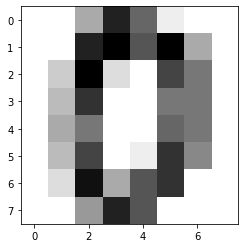

In [4]:
# Visualizing the image

import matplotlib.pyplot as plt

%matplotlib inline

plt.imshow(np_image,cmap="gray_r")


<Figure size 720x576 with 0 Axes>

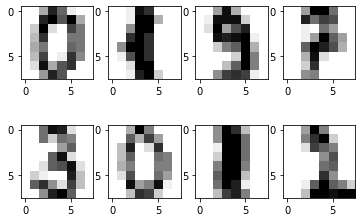

In [5]:
plt.figure(figsize=(10,8))
fig,array=plt.subplots(2,4)

array[0, 0].imshow(images_df.iloc[0].values.reshape(8,8), cmap='gray_r')
array[0, 1].imshow(images_df.iloc[99].values.reshape(8,8), cmap='gray_r')
array[0, 2].imshow(images_df.iloc[199].values.reshape(8,8), cmap='gray_r')
array[0, 3].imshow(images_df.iloc[299].values.reshape(8,8), cmap='gray_r')

array[1, 0].imshow(images_df.iloc[999].values.reshape(8,8), cmap='gray_r')
array[1, 1].imshow(images_df.iloc[1099].values.reshape(8,8), cmap='gray_r')
array[1, 2].imshow(images_df.iloc[1199].values.reshape(8,8), cmap='gray_r')
array[1, 3].imshow(images_df.iloc[1299].values.reshape(8,8), cmap='gray_r')

# Building a KNN Model

While a linear model or any other model assumes some linear or non linear relationship in the data that is not the case with the K Nearest Neighbour model. It compares every observation in the test set to all (or many as some implementation constraint the search) to all training observations  to look for similar observations. Then the algorithm finds the label with the most nearby observations and assigns that as a prediction to the unseen observation.

### Dividing the data into train and test

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(images_df,labels,train_size=0.8)

### Training and testing the model

In [7]:
# Train test validation
# Write a function that trains a knn model

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score

# Train Test Validation
def knn_train(features,target,k):
    '''
    Takes in features data,target data(variable to predict) and k which is the n_neighbors parameter'''
    
    knn=KNeighborsClassifier(n_neighbors=k)
    model=knn.fit(features,target)
    return model
    
# Write a function that test the knn model
def knn_test(model,test_features,actual):
    '''
    Takes in features from the test data and predicts the target column'''
    preds=model.predict(test_features)
    accuracy=accuracy_score(preds,actual)
    return accuracy
    
# Write a function that performs 4 fold cross validation using train and test

from sklearn.model_selection import KFold

# Cross validation
def cross_validate(k):
    '''
    Function takes in k as the n_neighbors parameter'''
    fold_accuracies=[]
    kf=KFold(n_splits=4,random_state=2,shuffle=True)
    for train_index,test_index in kf.split(images_df):
        train_data,test_data=images_df.loc[train_index],images_df.loc[test_index]
        train_labels,test_labels=labels.loc[train_index],labels.loc[test_index]
        model=knn_train(train_data,train_labels,k)
        acc=knn_test(model,test_data,test_labels)
        fold_accuracies.append(acc)
    return fold_accuracies
        
        
        
        

In [8]:
#Testing the above functions with n_neighbors as 4
model=knn_train(X_train,Y_train,4)
knn_test(model,X_test,Y_test)


0.9888888888888889

In [9]:
# Test the above function for different values of k

accuracies_knn={}

for k in range(1,11):
    '''
    loop for k between 1 and 10'''
    model=knn_train(X_train,Y_train,k)
    acc=knn_test(model,X_test,Y_test)
    accuracies_knn[k]=acc

accuracies_knn   

{1: 0.9833333333333333,
 2: 0.9861111111111112,
 3: 0.9888888888888889,
 4: 0.9888888888888889,
 5: 0.9916666666666667,
 6: 0.9888888888888889,
 7: 0.9916666666666667,
 8: 0.9861111111111112,
 9: 0.9833333333333333,
 10: 0.9861111111111112}

In [10]:
# Get the k with maximum accuracy

max(accuracies_knn, key= lambda x: accuracies_knn[x])

5

In [11]:
# From the above we can see that we get the maximum accuracy at k=5
#We will use this value of k and test the accuracies using k=5 for cross validation
accuracies=cross_validate(5)
np.mean(accuracies)


0.9849777282850779

### Conclusion for KNN model
As we have seen above KNN model has also yielded us a good accuracy of ~98%. However we have the following limitations with knn:
1. high memory usage (for each new unseen observation, many comparisons need to be made to seen observations)
2. no model representation to debug and explore

# Building a Neural Network

Initially we will be building a neural network with single layer and later on we will star adding hidden layers and start huper tuning the parameters to check if they improve the accuracy.

### Model with single hidden layer

In [12]:
from sklearn.neural_network import MLPClassifier

def train_nn(features,target,n):
    '''
    function will take input of features,labels(target) and neuron arch.
    Neuron arch will be (1,) if model with single hidden layer;(2,2) if double hidden layer and 2 neurosn each and so on'''
    mlp=MLPClassifier(hidden_layer_sizes=n)
    '''
    Neural network with single layer with n neurons'''
    model=mlp.fit(features,target)
    return model

def test_nn(features,target,model):
    '''
    function will take input of features,target and model'''
    preds=model.predict(features)
    accuracy=accuracy_score(target,preds)
    return accuracy

def cross_validation_nn(n,splits):
    '''
    Will take the input as number of neurons and splits for KFold
    '''
    kf=KFold(n_splits=splits,shuffle=True,random_state=1)
    fold_accuracies=[]
    for train_index,test_index in kf.split(images_df):
        train_data,test_data=images_df.loc[train_index],images_df.loc[test_index]
        train_labels,test_labels=labels.loc[train_index],labels.loc[test_index]
        mlp=MLPClassifier(hidden_layer_sizes=n)
        model=mlp.fit(train_data,train_labels)
        preds=model.predict(test_data)
        accuracy=accuracy_score(test_labels,preds)
        fold_accuracies.append(accuracy)
    return fold_accuracies
        
        
        
neurons=[(8,),(16,),(32,),(64,),(128,),(256,)]

accuracies_nn={}

for n in neurons:
    accuracy=cross_validation_nn(n,4)
    accuracy_mean=np.mean(accuracy)
    '''
    Averaging out the accuracies across 4 folds for a value of n '''
    accuracies_nn[n]=accuracy_mean

accuracies_nn

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Conv

{(8,): 0.8986946300420687,
 (16,): 0.9571529324424648,
 (32,): 0.9654974016332591,
 (64,): 0.9682739420935412,
 (128,): 0.9682727047760455,
 (256,): 0.979404850284583}

### Conclusion for single layer neural network model

From the 4 fold cross validation with single layer and different values of neurons we can see that the maximum accuracy we can get is ~97% which is not a improvement over knn model. Hence neural network with single layer is definitely not helping to get better results. It is known that the accuracy of neural networs improves with increase in number of layers.Hence we will try doing that and check if there is improvement in accuracy.

### Model with two  hidden layers

In [13]:
neurons_2layers=[(8,8),(16,16),(32,32),(64,64),(128,128),(256,256)]

accuracies_nn_two_layers={}

for n in neurons_2layers:
    accuracy=cross_validation_nn(n,4)
    accuracy_mean=np.mean(accuracy)
    '''
    Averaging out the accuracies across 4 folds for a value of n '''
    accuracies_nn_two_layers[n]=accuracy_mean

accuracies_nn_two_layers

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Conv

{(8, 8): 0.8920848799802029,
 (16, 16): 0.9465775798069784,
 (32, 32): 0.9593714427122,
 (64, 64): 0.96661717396684,
 (128, 128): 0.9749554565701559,
 (256, 256): 0.9777369463004207}

In [14]:
# Testing the model on train data 
kf=KFold(n_splits=4,shuffle=True,random_state=1)
fold_accuracies_train_nn=[]
for train_index,test_index in kf.split(images_df):
    train_data,test_data=images_df.loc[train_index],images_df.loc[test_index]
    train_labels,test_labels=labels.loc[train_index],labels.loc[test_index]
    mlp=MLPClassifier(hidden_layer_sizes=(256,256))
    model=mlp.fit(train_data,train_labels)
    preds=model.predict(train_data)
    accuracy=accuracy_score(train_labels,preds)
    fold_accuracies_train_nn.append(accuracy)
np.mean(fold_accuracies_train_nn)

fold_accuracies_train_nn

[1.0, 1.0, 1.0, 1.0]

### Conclusion for two layer neural network model

From the above we can see that the accuracy has improved over the single layer neural network model.However when we check the accuracy of the model over training set we can see that the model is almost 100% accurate.There is a high chance that our model has overfitted the data.